In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt
from joblib import parallel_backend

from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.datasets import make_moons
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    mean_squared_error,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_curve,
    auc,
    roc_curve,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_curve,
)
from sklearn.model_selection import train_test_split

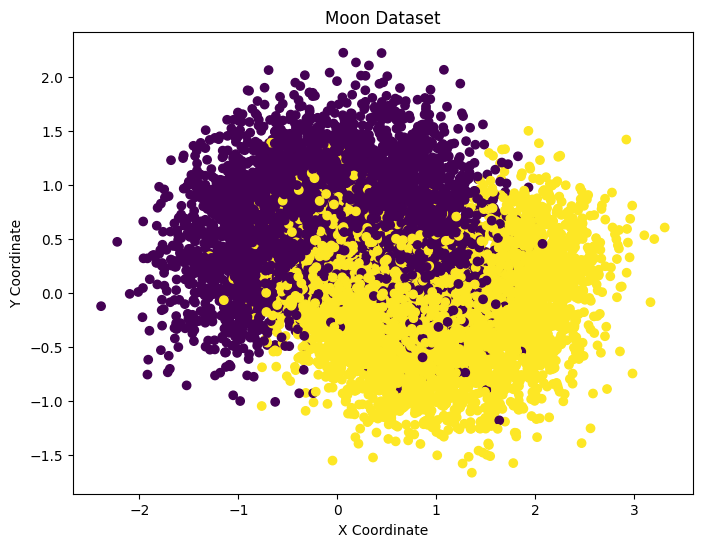

In [2]:
# moons dataset

# x is the generated sample.
# y is the class label for each sample.
x, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

# split the dataset into training and testing sets, 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# visualise the moons dataset
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="viridis")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Moon Dataset")
plt.show()

In [24]:
# Decision Tree

# params represents the hyperparameters to tune:
# - max_depth: the maximum depth of the tree, allowing the tree to grow deeper
# but potentially overfitting the data
# - min_samples_split: the minimum number of samples required to split an internal
# node, allowing the tree to split nodes with a small number of samples but
# potentially overfitting the data
# - min_samples_leaf: the minimum number of samples required to be at a leaf node,
# allowing the tree to create leaves with a small number of samples but
# potentially overfitting the data
# - criterion: the function to measure the quality of a split, either 'gini'
# or 'entropy'.
params = {
    'max_leaf_nodes': list(range(2, 50)),
    'min_samples_split': [2, 3, 4],
    'criterion' : ["gini", "entropy"],
}

# GridSearchCV is a function that performs an exhaustive search over a specified
# parameter grid, evaluating the estimator performance at each grid point using
# 10 fold cross validation.
# Accuracy is used as the scoring metric to evaluate the performance of the
# estimator.
dt_grid_search_cv = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    params,
    n_jobs=-1,
    verbose=1,
    cv=10,
    scoring="accuracy",
)

# Fit the grid search to the data
dt_grid_search_cv.fit(x_train, y_train)

# Get the best estimator
best_dt = dt_grid_search_cv.best_estimator_

# Predict against the best estimator model, using the test data
y_pred_dt = best_dt.predict(x_test)

# Output model information for the best estimator
print("Best estimator:", dt_grid_search_cv.best_estimator_)
print("Best parameters:", dt_grid_search_cv.best_params_)

# Output the performance metrics for the best estimator
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 score:", f1_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("AUC:", roc_auc_score(y_test, y_pred_dt))

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Best estimator: DecisionTreeClassifier(max_leaf_nodes=32, random_state=42)
Best parameters: {'criterion': 'gini', 'max_leaf_nodes': 32, 'min_samples_split': 2}
MSE: 0.1265
Accuracy: 0.8735
F1 score: 0.8733099649474211
Precision: 0.8633663366336634
Recall: 0.8834853090172239
AUC: 0.8736281431561934


In [4]:
# Support Vector Machine, specifically a Support Vector Classifier (SVC) as
# the dataset is a binary classification problem (moons dataset).

# params represents the hyperparameters to tune:
# - C: the regularization parameter, the strength of the regularization is
# inversely proportional to C. Enables the model to find the balance between
# decision boundary and misclassification.
# - kernel: the kernel type to be used in the algorithm, either 'rbf' or 'poly'.
# Both kernels can handle non-linear decision boundaries.
# - gamma: the kernel coefficient for 'rbf' and 'poly' kernels.
# smaller values result in a smoother decision boundary, larger values result
# in a more complex decision boundary.
params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly'],
    'gamma': [0.01, 0.1, 1]
}

# GridSearchCV is a function that performs an exhaustive search over a specified
# parameter grid, evaluating the estimator performance at each grid point using
# 10 fold cross validation.
# Accuracy is used as the scoring metric to evaluate the performance of the
# estimator.
svc_grid_search_cv = GridSearchCV(
    SVC(random_state=42),
    params,
    n_jobs=6,
    verbose=1,
    cv=10,
    scoring="accuracy",
)

# Fit the grid search to the data
svc_grid_search_cv.fit(x_train, y_train)

# Get the best estimator
best_svm = svc_grid_search_cv.best_estimator_

# Predict against the best estimator model, using the test data
y_pred_svm = best_svm.predict(x_test)

# Output model information for the best estimator
print("Best estimator:", svc_grid_search_cv.best_estimator_)
print("Best parameters:", svc_grid_search_cv.best_params_)

# Output the performance metrics for the best estimator
print("MSE:", mean_squared_error(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1 score:", f1_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("AUC:", roc_auc_score(y_test, y_pred_svm))

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best estimator: SVC(C=10, gamma=1, random_state=42)
Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
MSE: 0.126
Accuracy: 0.874
F1 score: 0.8725985844287159
Precision: 0.8708375378405651
Recall: 0.8743667679837892
AUC: 0.8740047067954484


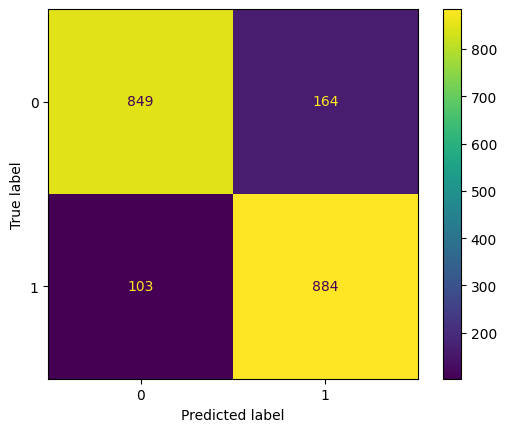

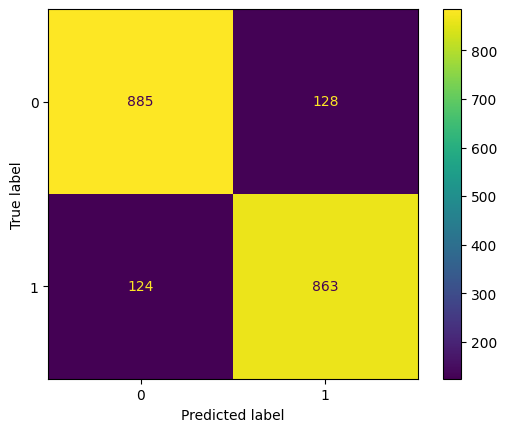

In [5]:
# Confusion Matrix

# Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=best_dt.classes_)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=best_dt.classes_)
disp_dt.plot()

# Support Vector Machine
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=best_svm.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=best_svm.classes_)
disp_svm.plot()

In [23]:
# Calculate the accuracy on the training set, to test for overfitting

# Decision Tree
y_pred_train_dt = best_dt.predict(x_train)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)

# Support Vector Machine
y_pred_train_svm = best_svm.predict(x_train)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)

# Print the accuracies on the training and test sets, a higher accuracy on the
# training set indicates overfitting.
print("Decision Tree - Training Accuracy:", accuracy_train_dt)
print("Decision Tree - Test Accuracy:", accuracy_dt)

print("SVM - Training Accuracy:", accuracy_train_svm)
print("SVM - Test Accuracy:", accuracy_svm)

Decision Tree - Training Accuracy: 0.862
Decision Tree - Test Accuracy: 0.8715
SVM - Training Accuracy: 0.864125
SVM - Test Accuracy: 0.874


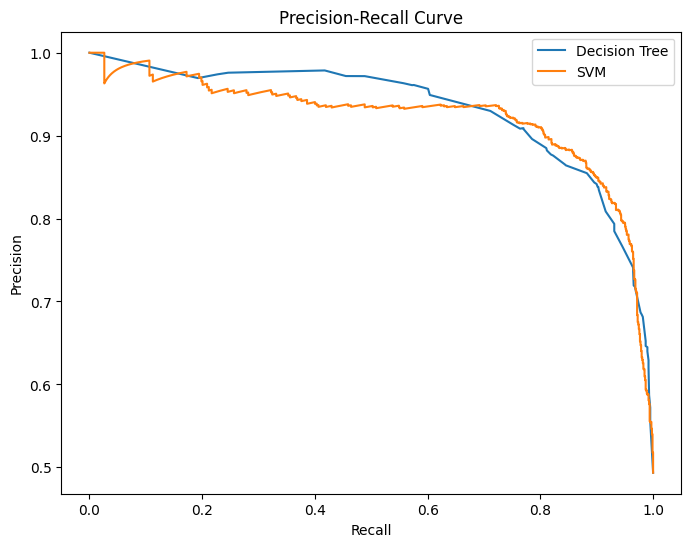

In [7]:
# print precision and recall curves

# predict probabilities of the positive class (class 1 moons) for Decision Tree
y_pred_proba_dt = best_dt.predict_proba(x_test)[:, 1]

# predict decision function of the positive class (class 1 moons) for SVM
y_pred_proba_svm = best_svm.decision_function(x_test)

precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_pred_proba_dt)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_pred_proba_svm)

plt.figure(figsize=(8, 6))
plt.plot(recall_dt, precision_dt, label="Decision Tree")
plt.plot(recall_svm, precision_svm, label="SVM")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

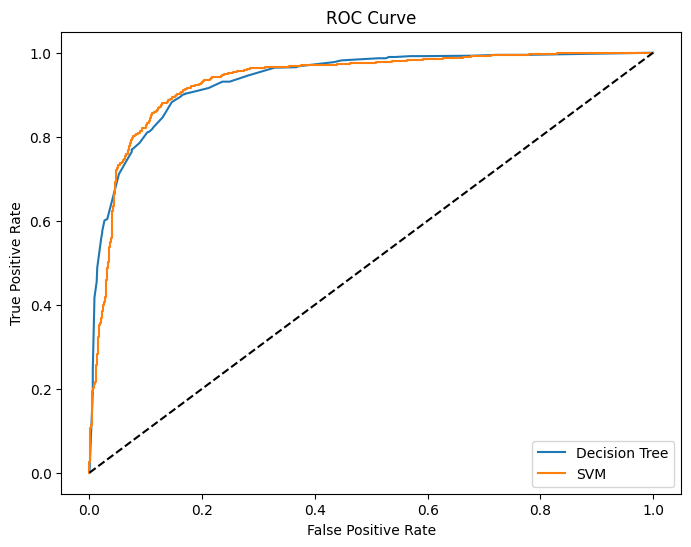

In [8]:
# print roc curves

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot(fpr_svm, tpr_svm, label="SVM")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.show()